## Introduction to Classification
<h6 align = 'right'>- Kushal Borkar </h6>

In this notebook, I have tried to replicate the methods shown in Lesson 3 - Classification Problem. In this case, I have taken 2 variables namely 'Test' and 'Grade', and the weights are taken as random(which are not known to me).

We will try to use Machine Learning Algorithm to separate the Blue and Red which represent the students are accepted and rejected respectively. Let work and try to use the ML algorithm before using Perceptron Algorithm.

### Libraries Required

In [1]:
# linear algebra
import numpy as np

# Data Processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd

# randomize the coordinates
import random

# Plotting 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set(context="notebook", style="whitegrid", rc={"axes.axisbelow": False})

# Warning
import warnings
warnings.filterwarnings("ignore")

### Creating the Dataset using Random

In [2]:
# initializing the x and y
x1, x2 = [], []
y = []

In [3]:
w1 = random.randint(1,5)
w2 = random.randint(1,5)
b = random.randint(-25,-15)
print(w1, w2, b)
for _ in range(1000):
    i, j = random.uniform(1, 10), random.uniform(1, 10)
    if w1*i + w2*j + b > 0:
        x1.append(i)
        x2.append(j)
        y.append(1)
    else:
        x1.append(i)
        x2.append(j)
        y.append(0)

5 3 -21


### Plotting the Data

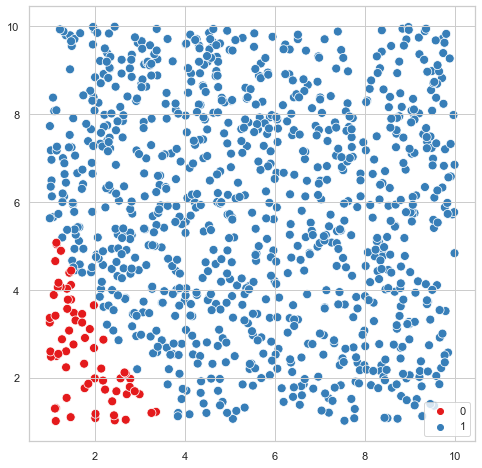

In [4]:
fig = plt.figure(figsize=[8,8])
colours = ListedColormap(['r','b'])
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x=x1, y=x2, hue=y, s=80, palette="Set1")
plt.show()

### Creating a Dataframe using Pandas

In [5]:
X = pd.DataFrame(list(zip(x1, x2)), columns =['Test', 'Grade'])
X.head() 

,Test,Grade
0,8.385363,4.888387
1,7.994326,3.069397
2,8.057003,8.307273
3,9.390548,7.363758
4,2.281812,9.385846


### Machine Learning Algorithm



In [6]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

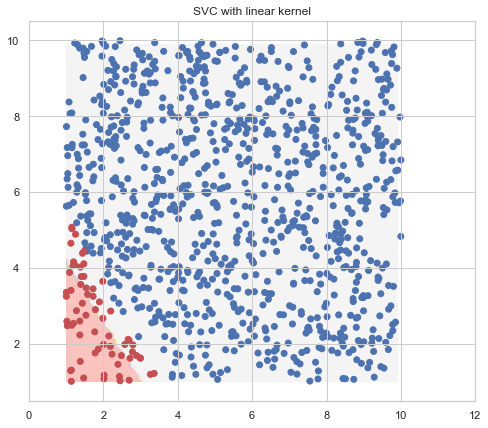

In [8]:
# create a mesh to plot in
x_min, x_max = 1, 10
y_min, y_max = 1, 10
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

# plot the logistic regression with the scatter plot
plt.figure(figsize = (8,7))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1, alpha=0.8)
plt.scatter(X['Test'], X['Grade'], c = y, cmap=colours)
plt.xlim(0, 12)
plt.title('SVC with linear kernel')
plt.show()

In [9]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.96


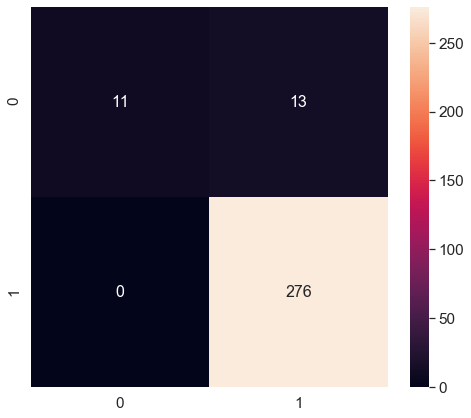

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (8,7))
sns.set(font_scale=1.4) # for label size
ax = sns.heatmap(confusion_matrix, annot=True, annot_kws={"size": 16}, fmt="d")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.46      0.63        24
           1       0.96      1.00      0.98       276

    accuracy                           0.96       300
   macro avg       0.98      0.73      0.80       300
weighted avg       0.96      0.96      0.95       300



___Using SVM___

In [12]:
from sklearn import svm

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1,gamma='auto').fit(X_train, y_train)

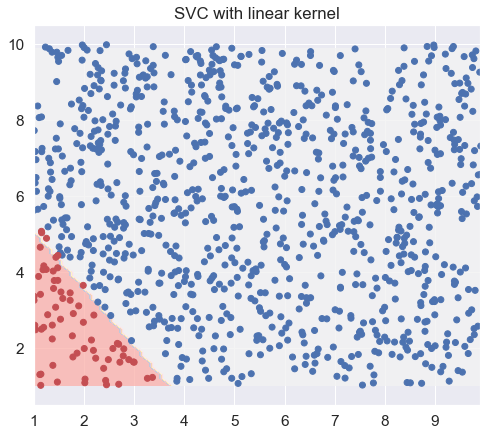

In [14]:
# create a mesh to plot in
x_min, x_max = 1, 10
y_min, y_max = 1, 10
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

plt.figure(figsize = (8,7))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1, alpha=0.8)
plt.scatter(X['Test'], X['Grade'], c = y, cmap=colours)
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

In [15]:
y_pred = svc.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(svc.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.99


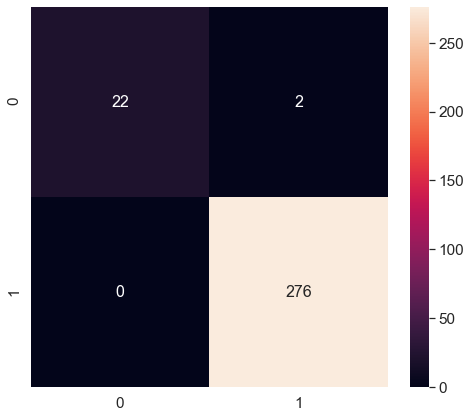

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (8,7))
sns.set(font_scale=1.4) # for label size
ax = sns.heatmap(confusion_matrix, annot=True, annot_kws={"size": 16}, fmt="d")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        24
           1       0.99      1.00      1.00       276

    accuracy                           0.99       300
   macro avg       1.00      0.96      0.98       300
weighted avg       0.99      0.99      0.99       300



___Using kNN___

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

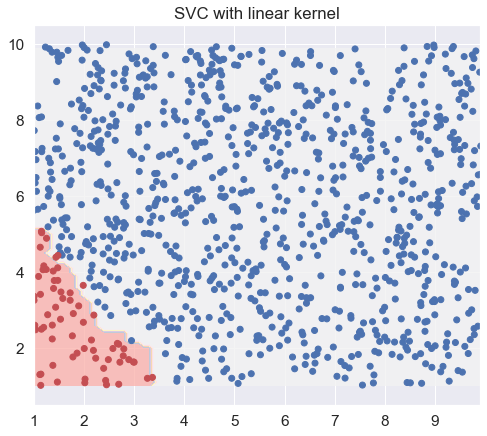

In [24]:
# create a mesh to plot in
x_min, x_max = 1, 10
y_min, y_max = 1, 10
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

plt.figure(figsize = (8,7))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1, alpha=0.8)
plt.scatter(X['Test'], X['Grade'], c = y, cmap=colours)
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

In [25]:
y_pred = knn.predict(X_test)

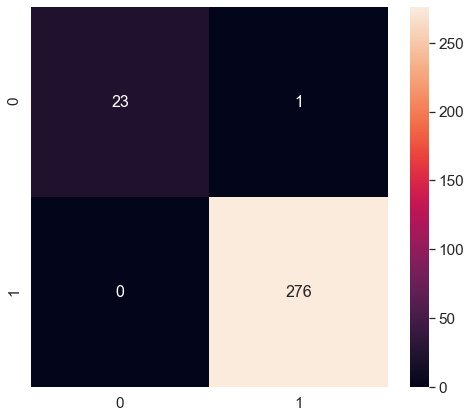

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (8,7))
sns.set(font_scale=1.4) # for label size
ax = sns.heatmap(confusion_matrix, annot=True, annot_kws={"size": 16}, fmt="d")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        24
           1       0.99      1.00      1.00       276

    accuracy                           0.99       300
   macro avg       1.00      0.96      0.98       300
weighted avg       0.99      0.99      0.99       300

